In [89]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# DBScan Customer Segementation

In [81]:
data  = pd.read_csv("customers.csv")
#drop non-continuous variables
data.drop(['Channel', 'Region'], axis = 1, inplace = True)

In [82]:
data = data[["Frozen", "Fresh", "Milk"]]
data_array = data.as_matrix().astype("float32", copy = False)

In [83]:
data.head()

,Frozen,Fresh,Milk
0,214,12669,9656
1,1762,7057,9810
2,2405,6353,8808
3,6404,13265,1196
4,3915,22615,5410


In [84]:
dbsc = DBSCAN(eps = 5000, min_samples = 50).fit(data_array)
labels = dbsc.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1, -1,  0,  0,  0, -1,
        0,  0, -1, -1,  0, -1, -1,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

<function matplotlib.pyplot.show>

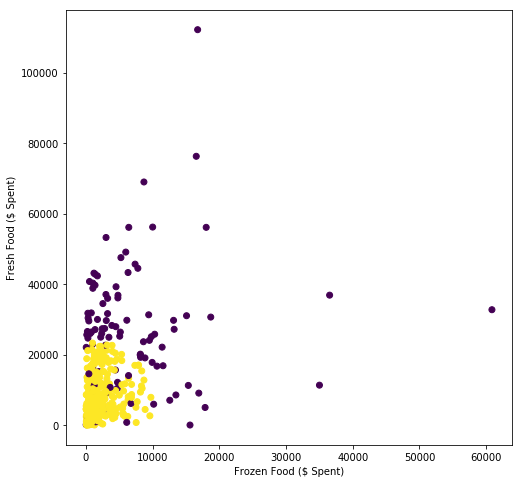

In [85]:
plt.figure(figsize=(8,8))
plt.scatter(data_array[:,0], data_array[:,1], c= labels)
plt.xlabel("Frozen Food ($ Spent)")
plt.ylabel("Fresh Foodd ($ Spent)")
plt.show

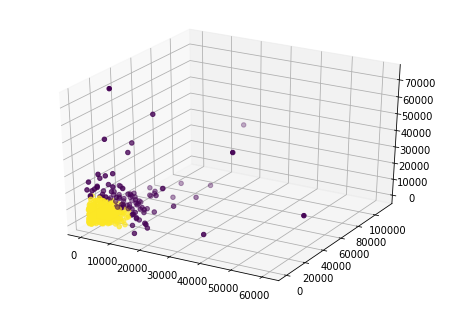

In [90]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(data_array[:,0], data_array[:,1], data_array[:,2], c= labels)

# Iris Dataset

['setosa' 'versicolor' 'virginica']


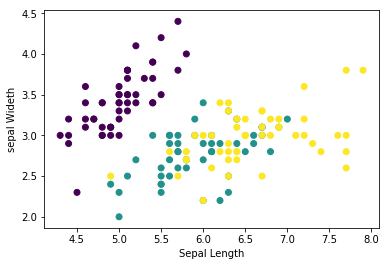

In [32]:
from sklearn import datasets

iris_df = datasets.load_iris()

print(iris_df.target_names)
label = {0:'red', 1: 'blue', 2: 'green'}

x_axis = iris_df.data[:,0]
y_axis = iris_df.data[:,1]

plt.scatter(x_axis, y_axis, c = iris_df.target)

plt.xlabel('Sepal Length')
plt.ylabel("sepal Wideth")
plt.show()

In [54]:
dbsc = DBSCAN(eps = 1, min_samples = 50).fit(iris_df.data)
labels = dbsc.labels_

<function matplotlib.pyplot.show>

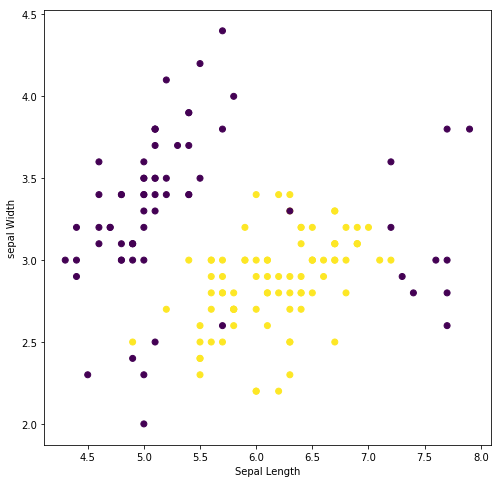

In [56]:
plt.figure(figsize=(8,8))
plt.scatter(iris_df.data[:,0], iris_df.data[:,1], c= labels)
plt.xlabel("Sepal Length")
plt.ylabel("sepal Width")
plt.show

# Earthquakes

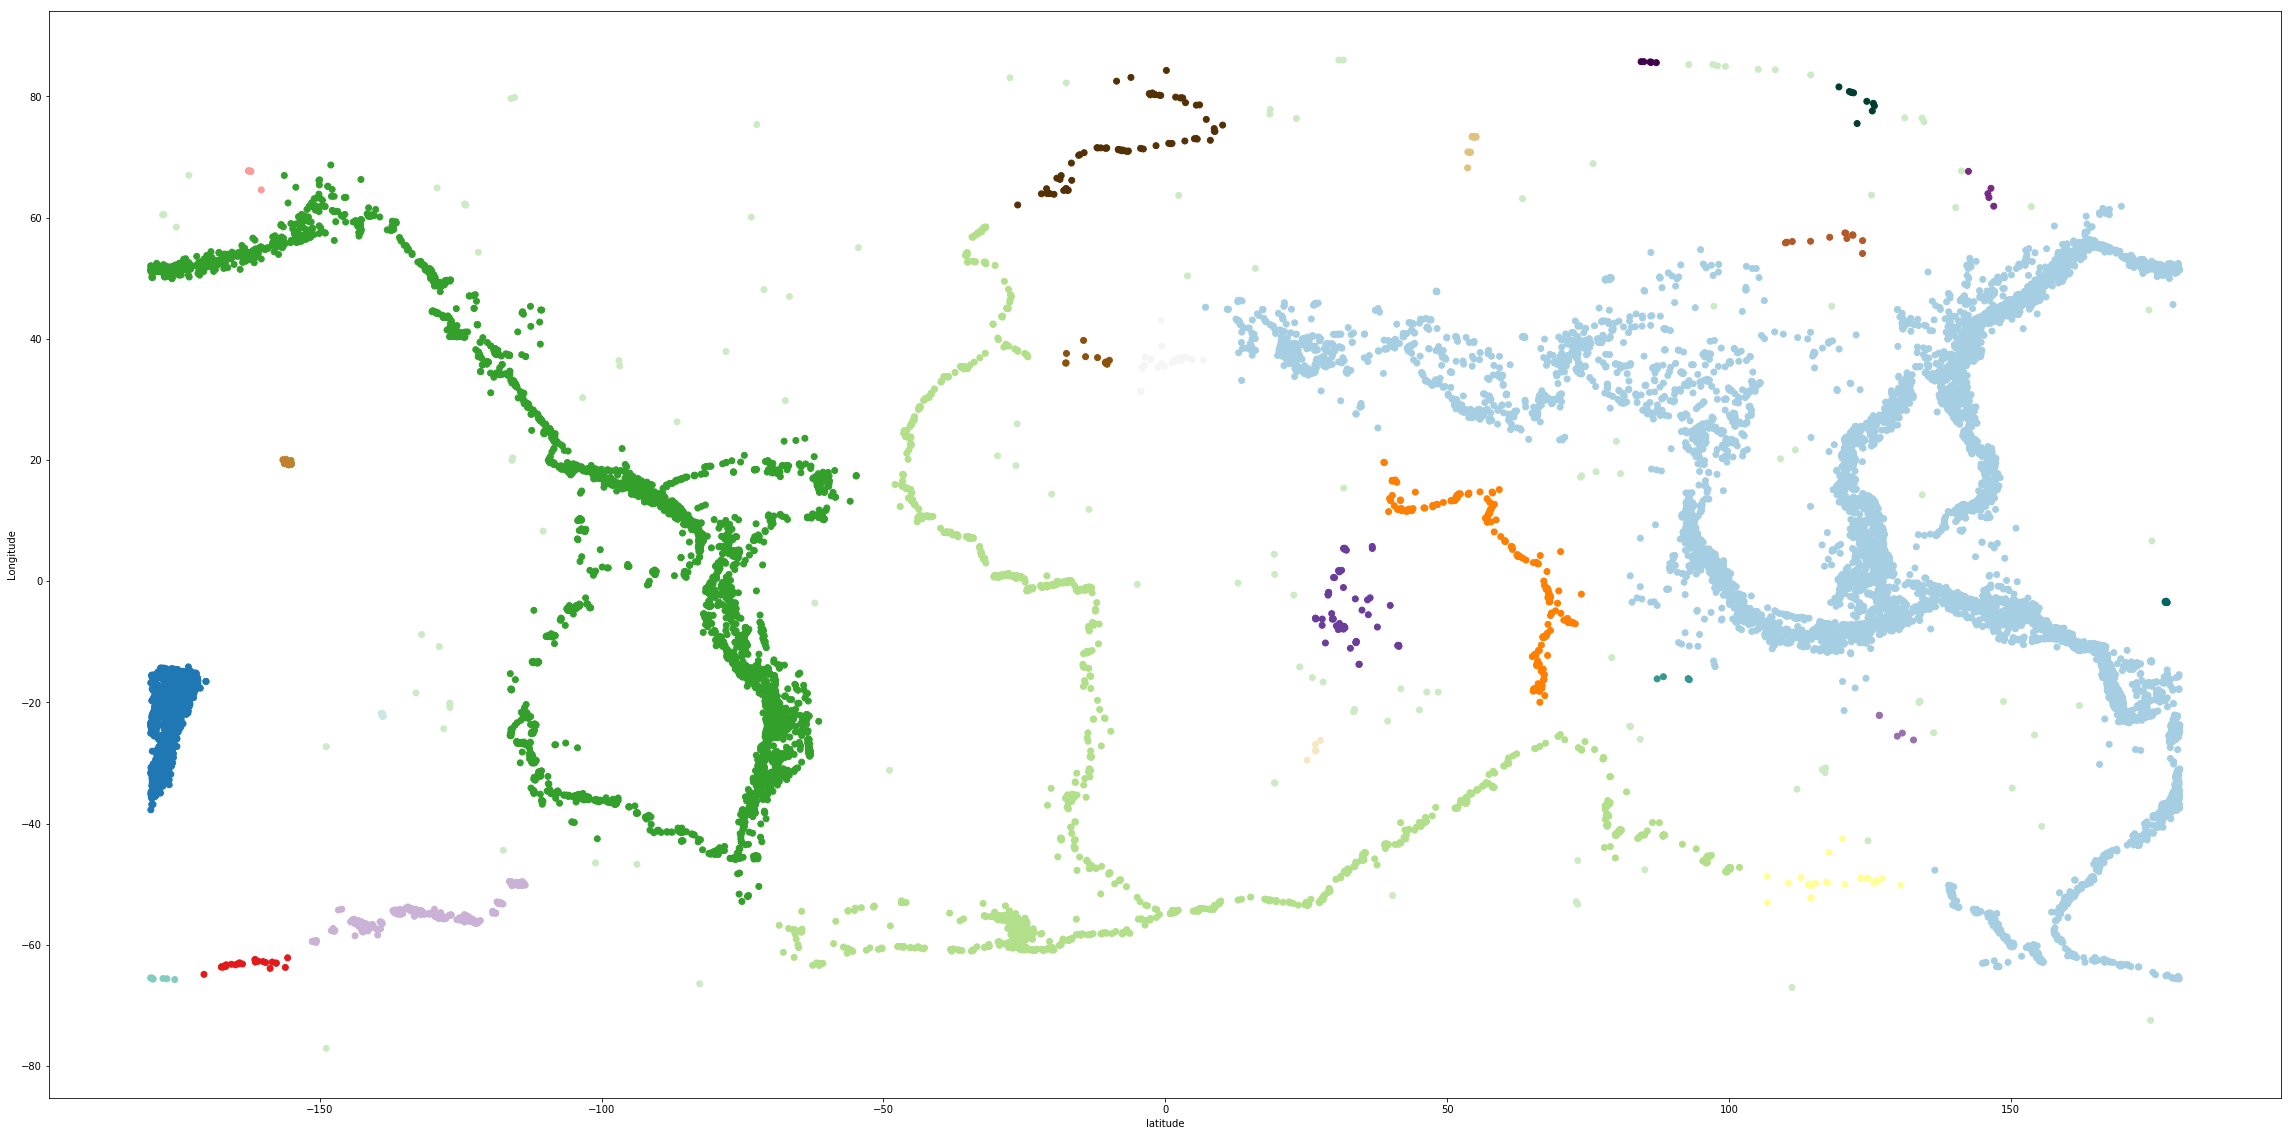

In [65]:
eq_data = pd.read_csv('eq_data.csv')

def set_colors(labels, colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#ff7f00',
                                '#cab2d6','#6a3d9a','#ffff99','#b15928','#543005','#8c510a','#bf812d',
                                '#dfc27d','#f6e8c3','#f5f5f5','#c7eae5','#80cdc1','#35978f','#01665e',
                                '#003c30','#40004b','#762a83','#9970ab','#c2a5cf','#e7d4e8','#f7f7f7',
                                '#d9f0d3','#a6dba0','#5aae61','#1b7837','#00441b','#8dd3c7','#ffffb3',
                                '#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9',
                                '#bc80bd','#ccebc5']):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels
    
    
estimator = DBSCAN(eps=5, min_samples=5, metric = 'euclidean')
X = eq_data[["Latitude","Longitude"]]
estimator.fit(X)

labels = estimator.labels_
colors = set_colors(labels)
plt.figure(figsize=(40,20))
plt.scatter(eq_data["Longitude"], eq_data["Latitude"], c = colors)
plt.xlabel("latitude")
plt.ylabel("Longitude")
plt.show()

# K-means

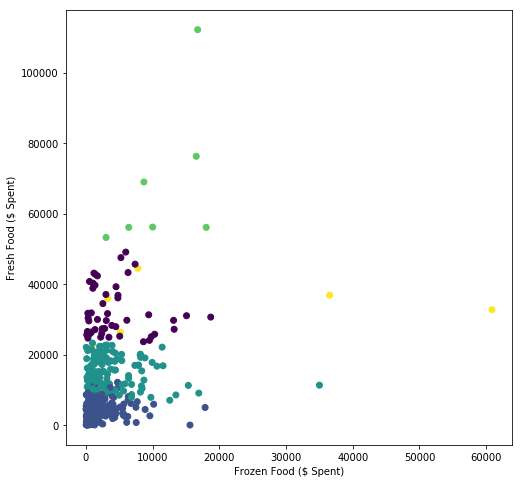

In [68]:
kmeans = KMeans(n_clusters = 5)

kmeans = kmeans.fit(data_array)

labels = kmeans.predict(data_array)
plt.figure(figsize=(8,8))
plt.scatter(data_array[:,0], data_array[:,1], c=labels)
plt.xlabel('Frozen Food ($ Spent)')
plt.ylabel('Fresh Food ($ Spent)')
plt.show()

# k-means prediction 2D dataset

In [69]:
plt.rcParams['figure.figsize'] = (16,9)

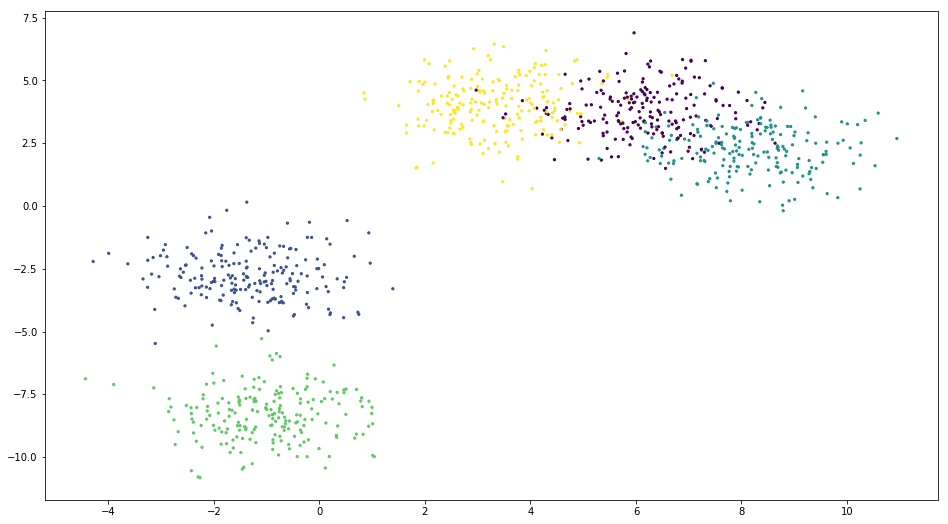

In [80]:
x1, y1 = make_blobs(n_samples=1000, n_features=2, centers=5)
fig, ax = plt.subplots()
ax.scatter(x1[:,0],x1[:,1], marker='o', s=5, c=y1)

# k-means prediction 3D dataset

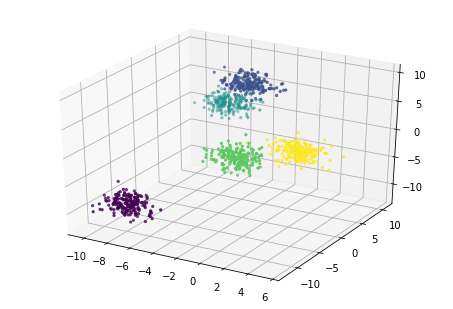

In [91]:
x2, y2 = make_blobs(n_samples=1000, n_features=3, centers=5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x2[:,0],x2[:,1],x2[:,2],marker='o',s=5,c=y2)

In [93]:
# k-means on the earthquake dataset
eq_data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,1/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [94]:
eq_data.values

array([['1/02/1965', '13:44:18', 19.246, ..., 'ISCGEM', 'ISCGEM',
        'Automatic'],
       ['1/04/1965', '11:29:49', 1.8630000000000002, ..., 'ISCGEM',
        'ISCGEM', 'Automatic'],
       ['1/05/1965', '18:05:58', -20.579, ..., 'ISCGEM', 'ISCGEM',
        'Automatic'],
       ...,
       ['12/28/2016', '12:38:51', 36.9179, ..., 'US', 'US', 'Reviewed'],
       ['12/29/2016', '22:30:19', -9.0283, ..., 'US', 'US', 'Reviewed'],
       ['12/30/2016', '20:08:28', 37.3973, ..., 'US', 'US', 'Reviewed']],
      dtype=object)

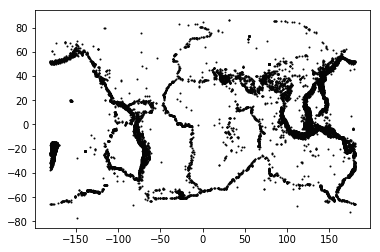

In [96]:
x = eq_data.values[:,2]
y = eq_data.values[:,3]
fig, ax = plt.subplots()
ax.scatter(y,x,marker='o',s=1,c='#050505')

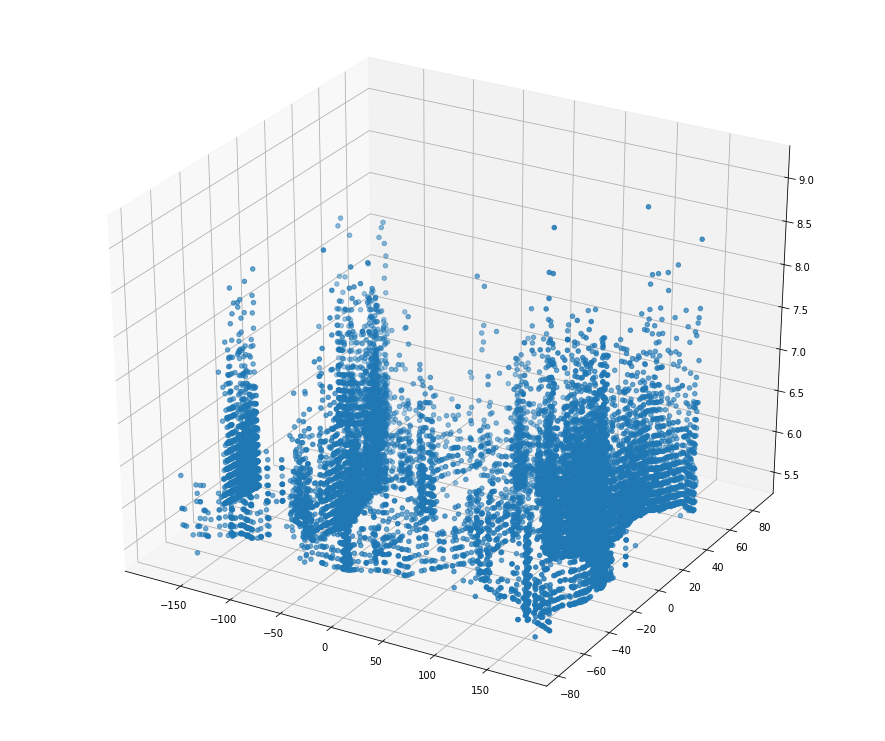

In [104]:
x = eq_data.values[:,2]
y = eq_data.values[:,3]
Z_mag = eq_data.values[:,6]
fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig)
ax.scatter(y,x,Z_mag)

In [118]:
# converting data into array format
eq_data_2d_array = eq_data[['Latitude','Longitude']]
eq_data_2d_array = eq_data_2d_array.as_matrix()

eq_data_3d_array = eq_data[['Latitude', 'Longitude','Magnitude']]
eq_data_3d_array = eq_data_3d_array.as_matrix()

In [119]:
#Running k-means

kmeans = KMeans(n_clusters=30)

kmeans = kmeans.fit(eq_data_2d_array)

labels3 = kmeans.predict(eq_data_2d_array)

c3 = kmeans.cluster_centers_

#Running k-means

kmeans = KMeans(n_clusters=30)

kmeans = kmeans.fit(eq_data_3d_array)

labels4 = kmeans.predict(eq_data_3d_array)

c4 = kmeans.cluster_centers_

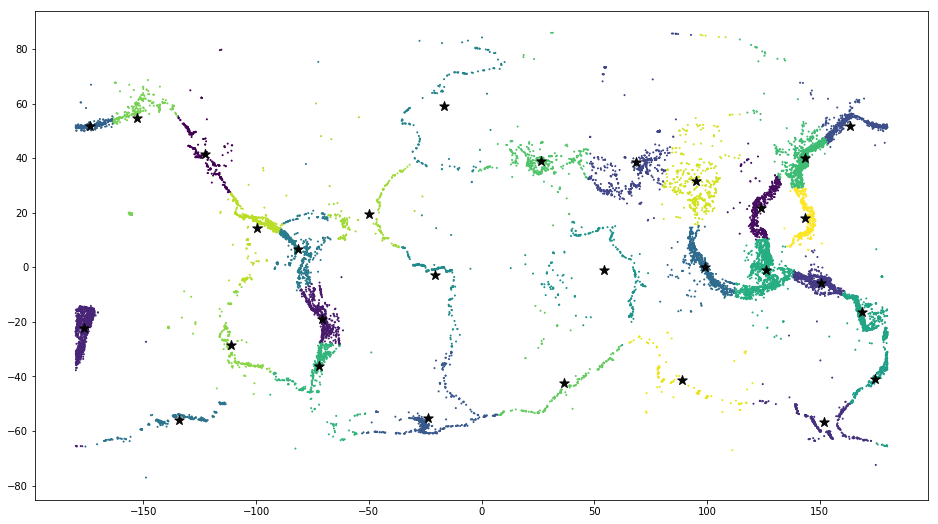

In [120]:
##test labels (k-measn)
plt.rcParams['figure.figsize'] = (16,9)
fig,ax = plt.subplots()
ax.scatter(eq_data_2d_array[:,1], eq_data_2d_array[:,0], marker = 'o',s=1,c=labels3)
ax.scatter(c3[:,1],c3[:,0],marker='*', c='#050505',s=100)

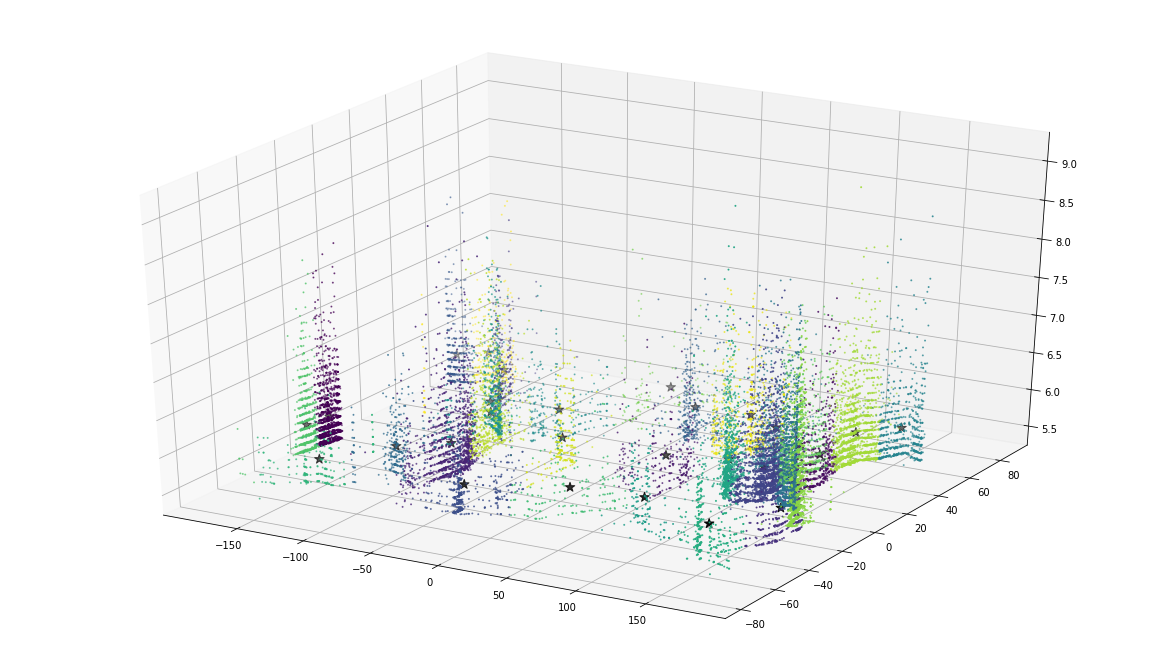

In [121]:
#3D - geographic location
#%matplotlib notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = (16,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(eq_data_3d_array[:,1], eq_data_3d_array[:,0],eq_data_3d_array[:,2], marker = 'o',s=1,c=labels4)
ax.scatter(c4[:,1],c4[:,0],c4[:,2],marker='*', c='#050505',s=100)

In [122]:
#k-means location&elevation/depth
eq_data_3d_array_depth = eq_data[['Latitude', 'Longitude','Depth']]
eq_data_3d_array_depth = eq_data_3d_array_depth.as_matrix()

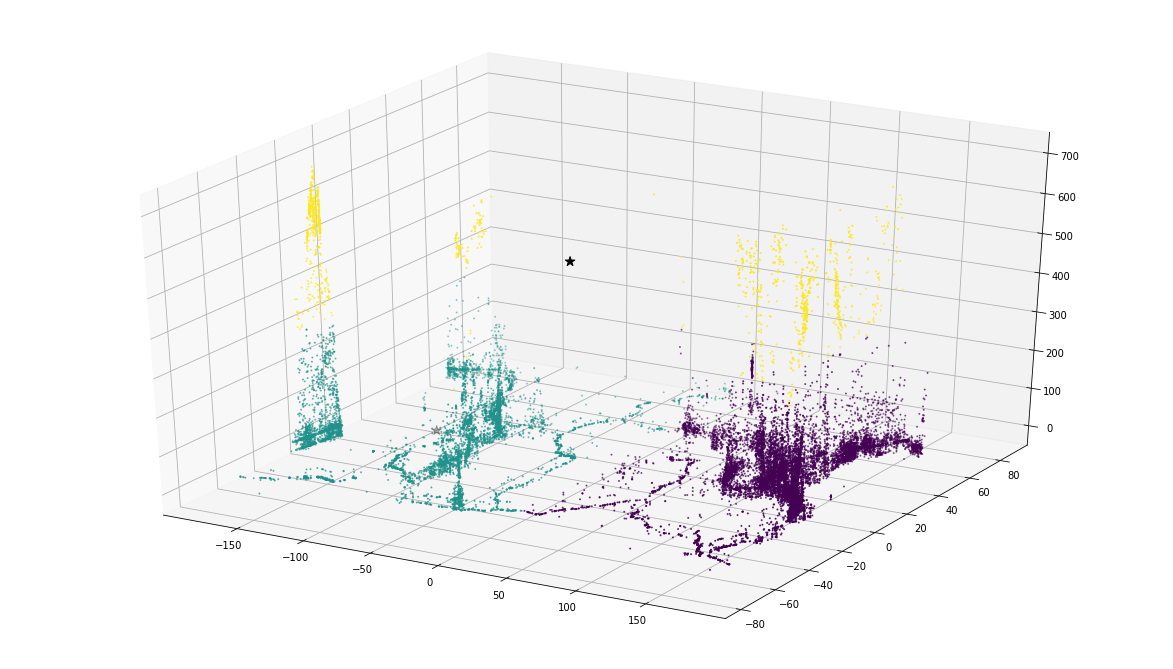

In [123]:
#fewer clusters
kmeans = KMeans(n_clusters=3)

kmeans = kmeans.fit(eq_data_3d_array_depth)

labels5 = kmeans.predict(eq_data_3d_array_depth)

c5 = kmeans.cluster_centers_

plt.rcParams['figure.figsize'] = (16,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(eq_data_3d_array_depth[:,1], eq_data_3d_array_depth[:,0],eq_data_3d_array_depth[:,2], marker = 'o',s=1,c=labels4)
ax.scatter(c5[:,1],c5[:,0],c5[:,2],marker='*', c='#050505',s=100)

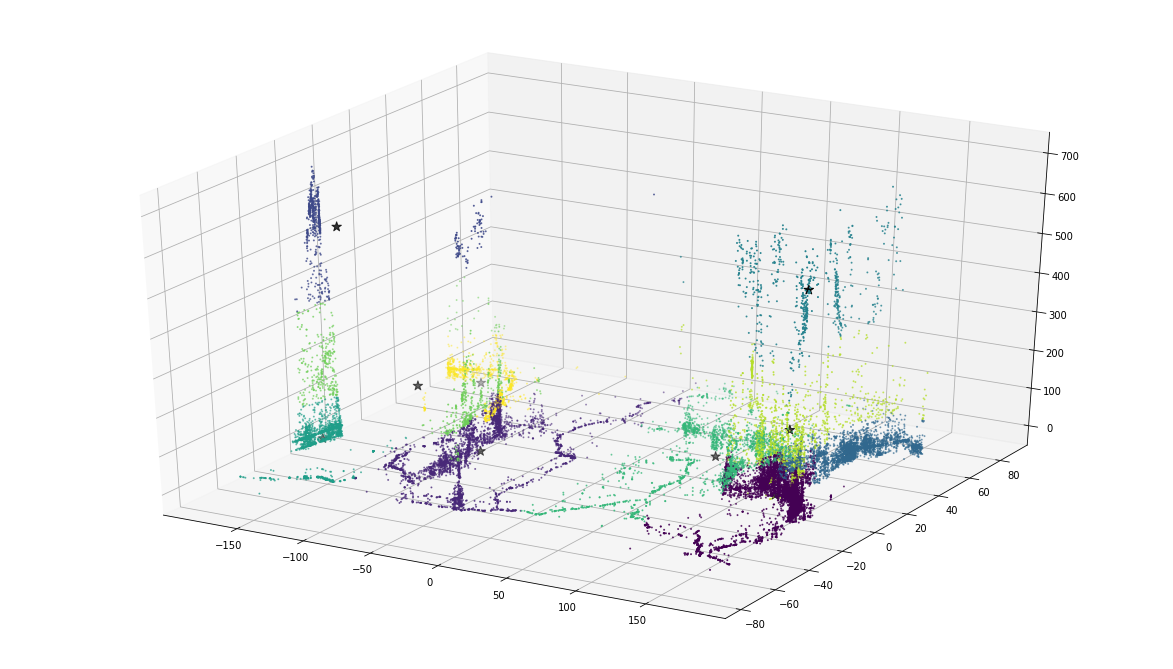

In [124]:
#many clusters
kmeans = KMeans(n_clusters=10)

kmeans = kmeans.fit(eq_data_3d_array_depth)

labels6 = kmeans.predict(eq_data_3d_array_depth)

c5 = kmeans.cluster_centers_

plt.rcParams['figure.figsize'] = (16,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(eq_data_3d_array_depth[:,1], eq_data_3d_array_depth[:,0],eq_data_3d_array_depth[:,2], marker = 'o',s=1,c=labels4)
ax.scatter(c5[:,1],c5[:,0],c5[:,2],marker='*', c='#050505',s=100)

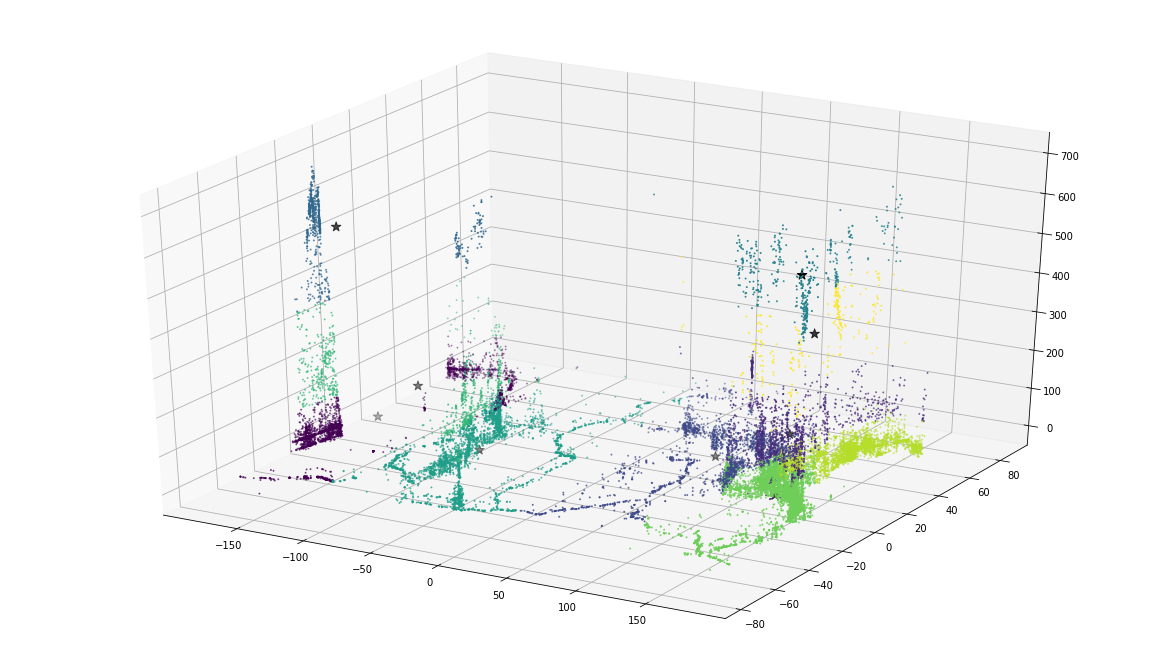

In [127]:
#over 3Ds, plotting as 3D

eq_data = pd.read_csv('eq_data.csv')
eq_data['year'] = eq_data.Date.str.split('/').str.get(2)
eq_data = eq_data.dropna()
eq_data_3d_array_year = eq_data[['Latitude','Longitude','year','Magnitude','Depth']].apply(pd.to_numeric)
eq_data_3d_array_year = eq_data_3d_array_year.as_matrix()

#many clusters
kmeans = KMeans(n_clusters=10)

kmeans = kmeans.fit(eq_data_3d_array_year)

labels6 = kmeans.predict(eq_data_3d_array_year)

c6 = kmeans.cluster_centers_

plt.rcParams['figure.figsize'] = (16,9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(eq_data_3d_array_year[:,1], eq_data_3d_array_year[:,0],eq_data_3d_array_year[:,4], marker = 'o',s=1,c=labels6)
ax.scatter(c6[:,1],c6[:,0],c6[:,4],marker='*', c='#050505',s=100)

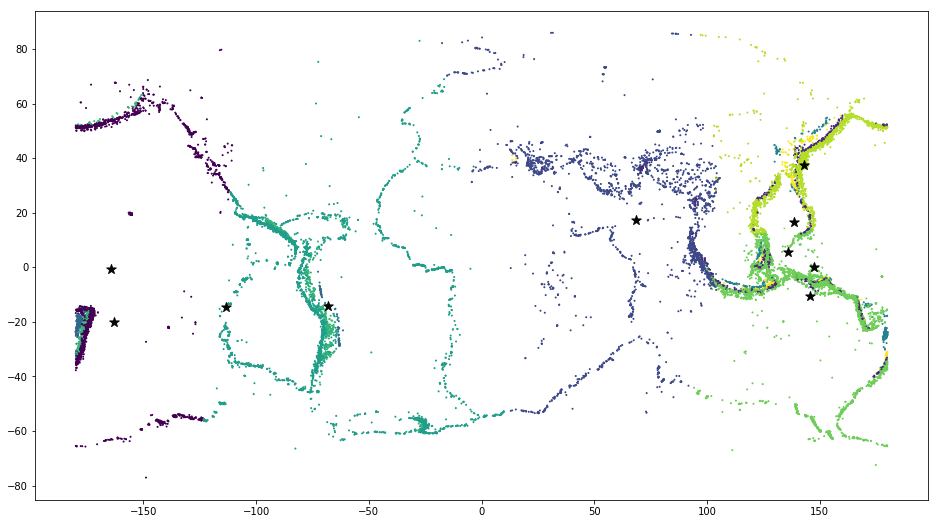

In [132]:
#test labels k-means
plt.rcParams['figure.figsize'] = (16,9)
fig,ax = plt.subplots()
ax.scatter(eq_data_3d_array_year[:,1],eq_data_3d_array_year[:,0],marker='o',s=1,c=labels6)
ax.scatter(c6[:,1],c6[:,0],marker='*',c='#050505',s=100)